  # Language Translation using Neural Networks 



In [297]:
#Reading and preprocessing
import pandas as pd
import numpy as np

In [298]:
f = open('Tamil.txt', 'r+', encoding="utf8")
x = f.readlines()

In [299]:
f = open('English.txt', 'r+', encoding="utf8")
y = f.readlines()

### I am using only 1000 examples to train pretty fast (I'm lazy FYI)

In [300]:
x = x[-1000:]

In [301]:
len(x)

1000

In [302]:
y = y[-1000:]

### Text Pre-processing

In [303]:
x[0]= x[0].strip('\ufeffMMA')
y[0]= y[0].strip('\ufeffMMA')

In [304]:
import string
exclude = set(string.punctuation)
for i in range(0,len(x)):
    x[i] = x[i].strip('\n')
    x[i] = ''.join(ch for ch in x[i] if ch not in exclude)

In [305]:
for i in range(0,len(y)):
    y[i] = y[i].lower()
    y[i] = y[i].strip('\n')
    y[i] = ''.join(ch for ch in y[i] if ch not in exclude)

### Cleaned text

In [306]:
print("Tamil Text:",x[1],"\n")
print("English Text:",y[1])

Tamil Text: உடன்படிக்கையில் கைச்சாத்திட்ட தொழிற்சங்கங்கள் மட்டுமன்றி அதன் எதிரிகளாகக் காட்டிக்கொள்ளும் தொழிற்சங்கங்களில் இருந்தும் முழுமையாக விலகுமாறு சோசக 

English Text: img srcimages2009seps18sri1480jpg border0 altplantation workers width480 height311 sep political committee member m thevarajah addressing balmoral estate workers


In [307]:
len(x)

1000

In [308]:
len(y)

1000

In [309]:
english_words = []
for i in range(0,len(y)):
    english_words.append(y[i].split())   

In [310]:
english_words = [j for sub in english_words for j in sub]

In [311]:
print("Number of Unique English words:",len(set(english_words)))

Number of Unique English words: 5563


In [312]:
tamil_words = []
for i in range(0,len(x)):
    tamil_words.append(x[i].split())  
tamil_words = [j for sub in tamil_words for j in sub]

In [313]:
print("Number of Unique Tamil words:",len(set(tamil_words)))

Number of Unique Tamil words: 9392


In [314]:
tamilvocab = len(set(tamil_words))
engvocab = len(set(english_words))

### Looks like there are more number of unique words in Tamil.....as expected

In [315]:
length_tamil=[]
for i in range(0,len(x)):
    length_tamil.append(len(x[i].split()))

In [316]:
length_english=[]
for i in range(0,len(y)):
    length_english.append(len(y[i].split()))

### Average number of words in each sentence

In [317]:
sum(length_english)/len(length_english)

23.444

In [318]:
sum(length_tamil)/len(length_tamil)

16.579

In [319]:
print(max(length_english))
print(max(length_tamil))

78
56


In [320]:
import collections
english_words_counter = collections.Counter([word for sentence in y for word in sentence.split()])
tamil_words_counter = collections.Counter([word for sentence in x for word in sentence.split()])

### Most common words in both languages

In [321]:
english_words_counter.most_common(10)

[('the', 1944),
 ('of', 905),
 ('and', 767),
 ('to', 672),
 ('in', 514),
 ('a', 438),
 ('that', 273),
 ('is', 264),
 ('for', 218),
 ('on', 185)]

In [322]:
tamil_words_counter.most_common(10)

[('மற்றும்', 170),
 ('ஒரு', 166),
 ('என்று', 139),
 ('இந்த', 94),
 ('அவர்', 59),
 ('என்ற', 57),
 ('அமெரிக்க', 56),
 ('அரசியல்', 54),
 ('ஆனால்', 53),
 ('வேண்டும்', 50)]

# Tokenizer:

Now that our corpus is ready we have to represent it in a way that the neural network can understand, So we convert the text representation to number representation. In words based representation each word his assigned a number abd in character based representation each character is assigned a number. I am using a word level model for its simpler complexity

Keras Tokenizer simplifies the representation process for us (This class allows to vectorize a text corpus, by turning each text into either a sequence of integers)


###  Setting gpu use to 0.3 as maximum gpu usage by CUDA results in internal error 

In [323]:
import tensorflow as tf

# Set the GPU memory fraction
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Limit GPU memory usage
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])  # Set memory limit (in MB)
    except RuntimeError as e:
        print(e)  # Memory growth must be set before initializing the runtime


In [324]:
from tensorflow.keras.preprocessing.text import Tokenizer
def tokenize(x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x) 
    return tokenizer.texts_to_sequences(x), tokenizer

In [325]:
x[0]

'நீங்கள் ஈரானையும் சேர்த்து மத்திய கிழக்கு முழுவதையும் பற்றி எரியச்செய்யக்கூடும் என கூறினார்'

In [326]:
z=(tokenize(x))
z[0][1]

[2000, 2001, 355, 1011, 29, 2002, 2003, 1012, 465, 356, 2004, 136]

In [327]:
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',]
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'brown': 3, 'fox': 4, 'jumps': 5, 'over': 6, 'lazy': 7, 'dog': 8, 'by': 9, 'jove': 10, 'my': 11, 'study': 12, 'of': 13, 'lexicography': 14, 'won': 15, 'a': 16, 'prize': 17}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 3, 4, 5, 6, 1, 7, 8]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [9, 10, 11, 2, 12, 13, 14, 15, 16, 17]


# Padding:

When batching the sequence of word ids together, each sequence needs to be the same length. Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.




In [328]:
from keras.preprocessing.sequence import pad_sequences
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

In [329]:
test_pad = pad(text_tokenized)
print("OUTPUT IS ALWAYS A LENGTH 10 ARRAY....FILLED BY 0s IN THE END")
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

OUTPUT IS ALWAYS A LENGTH 10 ARRAY....FILLED BY 0s IN THE END
Sequence 1 in x
  Input:  [1 2 3 4 5 6 1 7 8]
  Output: [1 2 3 4 5 6 1 7 8 0]
Sequence 2 in x
  Input:  [ 9 10 11  2 12 13 14 15 16 17]
  Output: [ 9 10 11  2 12 13 14 15 16 17]


### Apply all the tested preprocessing functions to our corpus

In [330]:
def preprocess(x, y):
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    print('shape before: ', preprocess_y.shape)
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)
    print('shape after: ', preprocess_y.shape)
        
    return preprocess_x, preprocess_y, x_tk, y_tk

In [331]:
preprocess_x, x_tk = tokenize(x)
preprocess_x = pad(preprocess_x)
preprocess_x.shape

(1000, 56)

In [332]:
preproc_tamil_sentences, preproc_english_sentences, tamil_tokenizer, english_tokenizer =\
    preprocess(x, y)

shape before:  (1000, 78)
shape after:  (1000, 78, 1)


## Assigning a number to each word

In [333]:
list(tamil_tokenizer.word_index.items())[:5]

[('மற்றும்', 1), ('ஒரு', 2), ('என்று', 3), ('இந்த', 4), ('அவர்', 5)]

In [334]:
list(english_tokenizer.word_index.items())[:5]

[('the', 1), ('of', 2), ('and', 3), ('to', 4), ('in', 5)]

# Logits to text

The neural network will be translating the input to words ids, which isn't the final form we want. We want the Tamil translation. The function logits_to_text will bridge the gab between the logits from the neural network to the Tamil translation.



In [335]:
def logits_to_text(logits, tokenizer):

    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [336]:
import os
from keras.models import load_model
import numpy as np

In [337]:
print("tamil_sentences shape: ", preproc_english_sentences.shape)
print("english_sentences  shape: ", preproc_tamil_sentences.shape)
print('output sequence length: ', preproc_english_sentences.shape[1])

tamil_sentences shape:  (1000, 78, 1)
english_sentences  shape:  (1000, 56)
output sequence length:  78


In [338]:
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_english_sentences.shape[-2], 1))

In [339]:
tmp_x.shape

(1000, 78, 1)

In [340]:
from keras.layers import GRU, Input, Dense, TimeDistributed
from keras.models import Model, Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy


def simple_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.1):
    model = Sequential()
    model.add(GRU(128, dropout=0.1,input_shape=input_shape[1:], return_sequences=True) )
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax') ))
    print('######## Summary ###########')
    model.summary()
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [341]:
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    engvocab+1,
    tamilvocab+1)

###########LOAD MODEL IF IT EXISTS OR ELSE TRAIN THE MODEL################

if os.path.exists(os.path.join("model", "translation.keras"))== False:
    rnn = simple_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=20, validation_split=0.2)
else:
    simple_rnn_model = load_model(os.path.join("model", "translation.keras"))

######## Summary ###########


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 78, 128)        │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 78, 9393)       │     1,211,697 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,262,001 (4.81 MB)

 Trainable params: 1,262,001 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5078 - loss: 6.6322 - val_accuracy: 0.7113 - val_loss: 3.4361
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7148 - loss: 3.0586 - val_accuracy: 0.7032 - val_loss: 2.6882
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7093 - loss: 2.5868 - val_accuracy: 0.7091 - val_loss: 2.6887
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7021 - loss: 2.5404 - val_accuracy: 0.7119 - val_loss: 2.6821
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7112 - loss: 2.3738 - val_accuracy: 0.7120 - val_loss: 2.6404
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7194 - loss: 2.2651 - val_accuracy: 0.7121 - val_loss: 2.6683
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7191 - loss: 2.2328 - val_accuracy: 0.7121 - val_loss: 2.6684
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7194 - loss: 2.2116 - val_accuracy: 0.7121 - val_loss: 2.6861
Epoch 9/20
8/8 

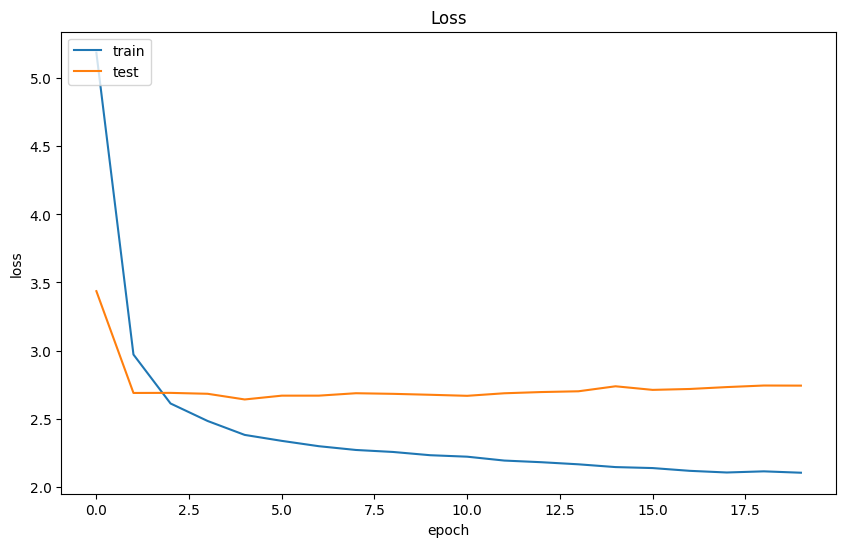

In [342]:
if rnn is not None:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(rnn.history['loss'])
    plt.plot(rnn.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
else:
    print("No training occurred, so no history is available to plot.")

In [343]:
## Save the model so that you can load it later 

In [344]:
score = simple_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.7146281599998474


In [345]:
score

[2.141895055770874, 0.7146281599998474]

### Pretty decent for a small dataset

In [346]:
x[15]

'ஒரு சோசலிச கலாச்சாரம்'

In [347]:
## PRETTY BAD TRANSLATION :(
print(logits_to_text(simple_rnn_model.predict(tmp_x[:100])[15], english_tokenizer))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step
fishermen the the the <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### "The" is being predicted for all words as it is the most common word....This is not ideal

## So let us now try LSTM and include an embedding layer 

In [348]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

def embed_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.1):
    model = Sequential()
    
    model.add(Embedding(input_dim=max(tamil_vocab_size, english_vocab_size), output_dim=128, input_length=output_sequence_length))

    model.add(LSTM(128, dropout=0.1, return_sequences=True))
    
    model.add(Dense(english_vocab_size, activation='softmax'))
    
    model.summary()
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    return model


In [349]:
#reshaping the input for processing embeddings
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])

In [350]:
tmp_x.shape

(1000, 78)

In [351]:
embed_rnn_model = embed_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(tamil_tokenizer.word_index)+1,
    len(english_tokenizer.word_index)+1)
if os.path.exists(os.path.join("cache", "LSTM.keras"))== False:
    embedrnn = embed_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=20, validation_split=0.2)
else:
    embed_rnn_model = load_model(os.path.join("cache", "LSTM.keras"))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.3390 - loss: 5.6308 - val_accuracy: 0.7075 - val_loss: 2.6776
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - accuracy: 0.7029 - loss: 2.5389 - val_accuracy: 0.6995 - val_loss: 2.7837
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.7083 - loss: 2.2906 - val_accuracy: 0.7042 - val_loss: 2.8216
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.7138 - loss: 2.0932 - val_accuracy: 0.6997 - val_loss: 2.9137
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.7184 - loss: 1.9547 - val_accuracy: 0.6764 - val_loss: 3.0247
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 410ms/step - accuracy: 0.7127 - loss: 1.8702 - val_accuracy: 0.6872 - val_loss: 3.0582
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.7230 - loss: 1.7345 - val_accuracy: 0.6868 - val_loss: 3.1069
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.7142 - loss: 1.7296 - val_accuracy: 0.6738 - val_loss:

In [352]:
embed_rnn_model.save(os.path.join("model", "LSTM.keras"))


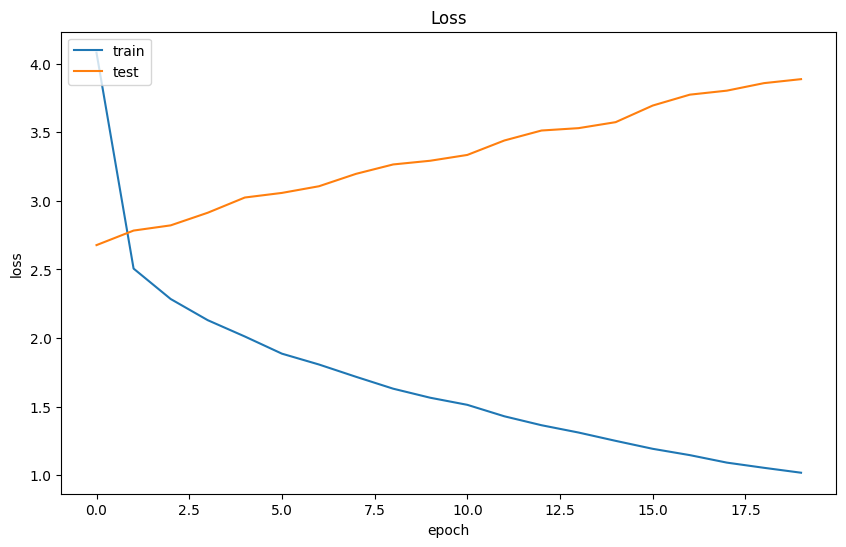

In [353]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(embedrnn.history['loss'])
plt.plot(embedrnn.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Validation loss seems to converge much faster

In [354]:
score = embed_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.7896923422813416


In [355]:
score

[1.4703257083892822, 0.7896923422813416]

In [356]:
x[15]

'ஒரு சோசலிச கலாச்சாரம்'

In [357]:
print(logits_to_text(embed_rnn_model.predict(tmp_x[:16])[15], english_tokenizer))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
a socialist culture <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [358]:
x[16]

'யெஸ் 135 மணி நேரங்கள் இடைவிடாமல் பேசி கின்னஸ் சாதனை செய்துள்ளார்'

In [359]:
print(logits_to_text(embed_rnn_model.predict(tmp_x[:100])[16], english_tokenizer))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
the report nonstop the 135 recovery the create a record record record broke 108 108 108 108 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### The translation is almost perfect 
 

In [360]:
(tmp_x[:100][10]).shape

(78,)

## Let us try with our own data

In [361]:
tamil_tokenizer.word_index['அரசியல்']

8

In [362]:
a = []
t = [0] * 74
s = [0] * 74

In [363]:
t[0] = 10
a.append(t)
a.append(s)

In [364]:
a=np.array(a)

In [365]:
a[:1][0]

array([10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [366]:
print(logits_to_text(embed_rnn_model.predict(a[:1])[0], english_tokenizer))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
the <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Overfitting is at play.....The model is responding badly to new information

# Bidirectional LSTM:

One restriction of a LSTM is that it can't see the future input, only the past. This is where bidirectional recurrent neural networks come in. They are able to see the future data.



In [367]:
from keras.layers import Bidirectional
def birnn_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.1):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.1),
                        input_shape=input_shape[1:]))
    
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax') ))
    model.summary() 
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])  
    return model

In [368]:
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_english_sentences.shape[-2], 1))

In [369]:
tmp_x.shape

(1000, 78, 1)

In [370]:
bi_rnn_model = birnn_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(tamil_tokenizer.word_index)+1)

bi_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=20, validation_split=0.2)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 78, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 78, 9390)       │     2,413,230 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,546,350 (9.71 MB)

 Trainable params: 2,546,350 (9.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5089 - loss: 5.6697 - val_accuracy: 0.6992 - val_loss: 3.2910
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7018 - loss: 3.3934 - val_accuracy: 0.6951 - val_loss: 3.3451
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7098 - loss: 3.2668 - val_accuracy: 0.7078 - val_loss: 3.2983
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7151 - loss: 3.2167 - val_accuracy: 0.7111 - val_loss: 3.2650
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7060 - loss: 3.3032 - val_accuracy: 0.7085 - val_loss: 3.2556
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7174 - loss: 3.1336 - val_accuracy: 0.7097 - val_loss: 3.2415
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7108 - loss: 3.1614 - val_accuracy: 0.7108 - val_loss: 3.2361
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7143 - loss: 3.1130 - val_accuracy: 0.7067 - val_loss: 3.2327
Epoch 9/

In [371]:
bi_rnn_model.save(os.path.join("model", "biRnn.keras"), overwrite=True)

In [372]:
score = bi_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.7094230055809021


In [373]:
score

[3.002609968185425, 0.7094230055809021]

In [374]:
x[16]

'யெஸ் 135 மணி நேரங்கள் இடைவிடாமல் பேசி கின்னஸ் சாதனை செய்துள்ளார்'

## It looks like they are performing worse.....so embeddings seem to be important

In [375]:
print(logits_to_text(bi_rnn_model.predict(tmp_x[:100])[16], english_tokenizer))

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step
the the and and and and and and of and <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


## It seems like a single layer LSTM with embeddings give the best results

### Reference:

https://github.com/Barqawiz/aind2-nlp-capstone-translation/blob/master/machine_translation.ipynb

